im01small.png -> im01.png
  SSD nearest : 847702528.00
  SSD bilinear: 715963392.00


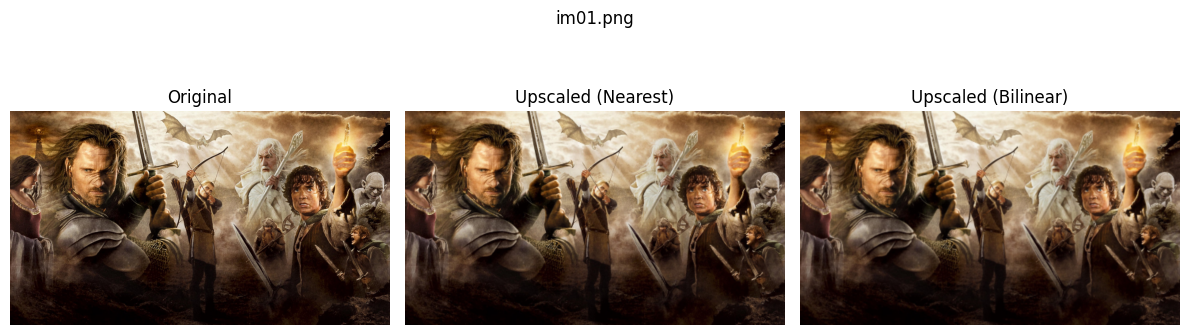

im02small.png -> im02.png
  SSD nearest : 182795248.00
  SSD bilinear: 126806936.00


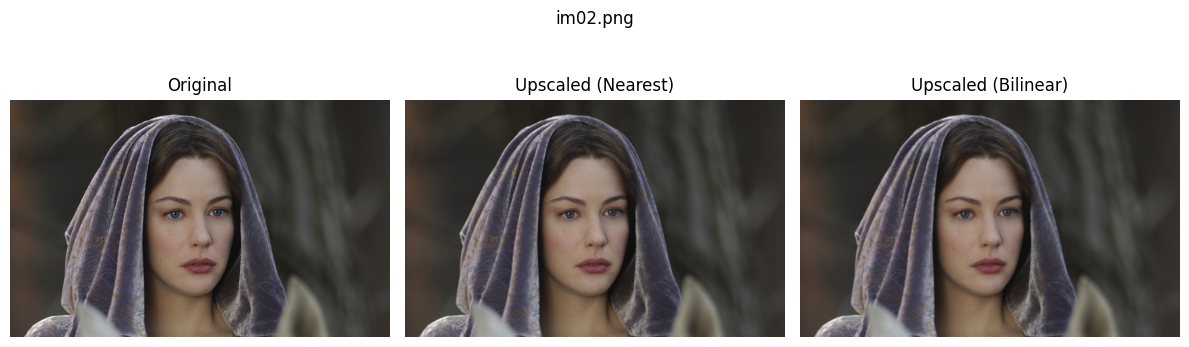

im03small.png -> im03.png
  SSD nearest : 709931968.00
  SSD bilinear: 520472704.00


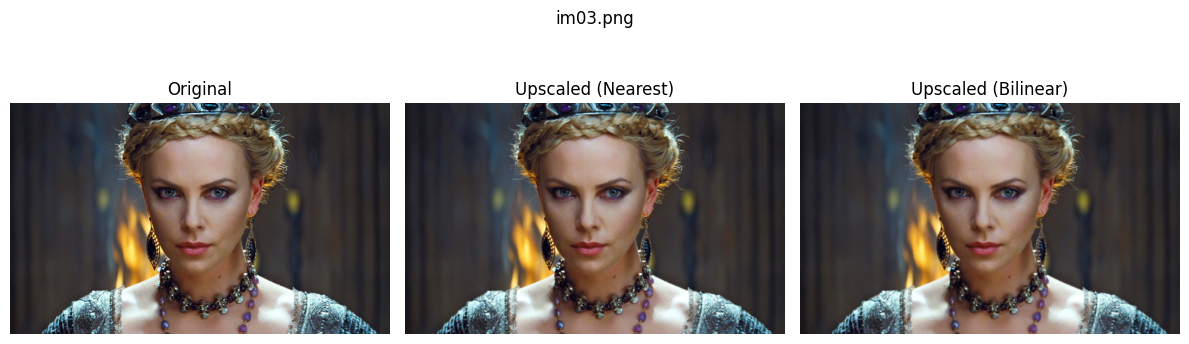

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def sumsq(x, y):
    x = x.astype(np.float32)
    y = y.astype(np.float32)
    return float(np.sum((x - y) ** 2))

file_pairs = [
    ("im01small.png", "im01.png"),
    ("im02small.png", "im02.png"),
    ("im03small.png", "im03.png"),
]

for lo_path, hi_path in file_pairs:
    lo = cv2.imread(lo_path)
    hi = cv2.imread(hi_path)
    if lo is None or hi is None:
        raise FileNotFoundError(f"{lo_path} or {hi_path} not found")

    H, W = hi.shape[:2]
    up_nn  = cv2.resize(lo, (W, H), interpolation=cv2.INTER_NEAREST)
    up_lin = cv2.resize(lo, (W, H), interpolation=cv2.INTER_LINEAR)

    d_nn  = sumsq(hi, up_nn)
    d_lin = sumsq(hi, up_lin)

    print(f"{lo_path} -> {hi_path}")
    print(f"  SSD nearest : {d_nn:.2f}")
    print(f"  SSD bilinear: {d_lin:.2f}")

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(hi, cv2.COLOR_BGR2RGB));     plt.title("Original");            plt.axis("off")
    plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(up_nn, cv2.COLOR_BGR2RGB));  plt.title("Upscaled (Nearest)");  plt.axis("off")
    plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(up_lin, cv2.COLOR_BGR2RGB)); plt.title("Upscaled (Bilinear)"); plt.axis("off")
    plt.suptitle(f"{os.path.basename(hi_path)}")
    plt.tight_layout(); plt.show()
